Train shape: (891, 12)
Test shape: (418, 11)
Accuracy: 0.7902097902097902


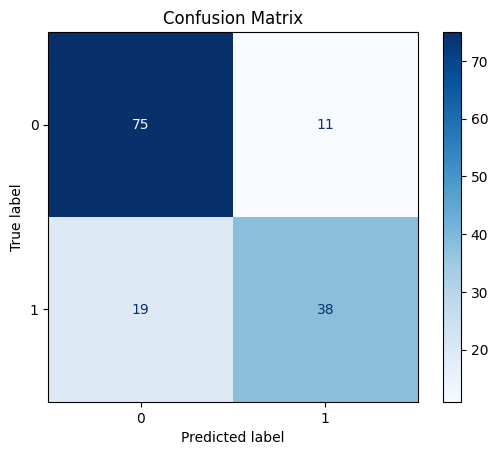

In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Load data (make sure train.csv and test.csv are in your working directory)
train_df = pd.read_csv("/Users/roswald/Downloads/Machine Learning/Titanic.csv/train.csv")
test_df = pd.read_csv("/Users/roswald/Downloads/Machine Learning/Titanic.csv/test.csv")


print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)

# Keep relevant columns and drop rows with missing values
train_df = train_df[['Survived', 'Pclass', 'Sex', 'Age', 'Fare']].dropna()

# Map 'Sex' to numeric
train_df['Sex'] = train_df['Sex'].map({'male': 0, 'female': 1})

# Features and target
X = train_df[['Pclass', 'Sex', 'Age', 'Fare']]
y = train_df['Survived']

# Train/test split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=1)

# Train model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
print("Accuracy:", accuracy)

# Plot confusion matrix
cm = confusion_matrix(y_val, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

# Optional: plot histogram of PassengerId from train_df (if available)
# train_df['PassengerId'].plot(kind='hist', bins=20, title='PassengerId')
# plt.gca().spines[['top', 'right']].set_visible(False)
# plt.show()
